# 二项分布

## 基本概念

**二项分布**是离散概率分布，描述在$n$次独立伯努利试验中成功次数的概率分布。

- **核心场景**：固定次数的二元试验（如抛硬币10次，产品抽样检验）。
- **参数**：
    - n：试验次数
    - p：单次试验成功概率（q=1−p 为失败概率）
- **随机变量**：$X∼Binomial(n,p)$，表示成功的总次数（X∈{0,1,…,n}）。

## 概率密度函数

设$X \sim \text{Binomial}(n, p)$，则：
$$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad k = 0, 1, ..., n$$
其中：
- $\binom{n}{k}$是组合数：“从 n 次试验中选出 k 次成功”的方式数 
- $p^k$：$k$次成功的概率 
- $(1-p)^{n-k}$：其余失败的概率 

## 均值与方差

- **均值**：$np$ 
- **方差**：$np(1-p)$

## 性质

- **可加性**：若$X \sim \text{Binomial}(n,p)$，$Y \sim \text{Binomial}(m,p)$，则$X+Y \sim \text{Bin}(n+m,p)$。
- **极限情况下性质**：
    - 当$n \to \infty$且$p$固定，二项分布逼近正态分布（中心极限定理）。
    - 当$n \to \infty$且$np$固定，逼近泊松分布（$\lambda = np$）。

## 图形

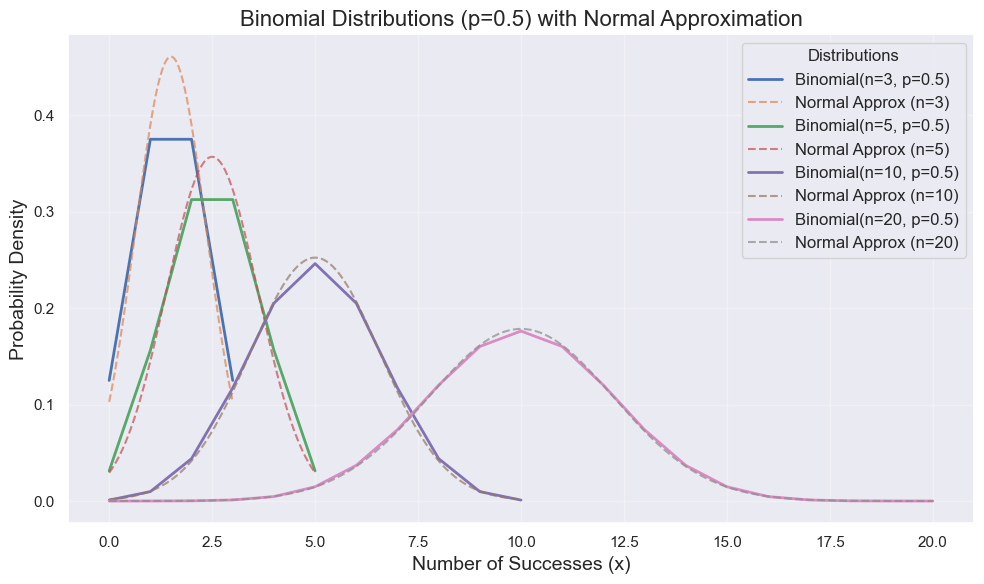

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import seaborn as sns
sns.set(style="darkgrid")

# 参数设置
p = 0.5
ns = [3, 5, 10, 20]

# 创建画布
plt.figure(figsize=(10, 6))

# 逐个 n 绘图
for n in ns:
    x = np.arange(0, n + 1)
    pmf = binom.pmf(x, n, p)
    plt.plot(x, pmf, label=f'Binomial(n={n}, p={p})', linewidth=2)

    # 添加正态分布近似曲线（连续）
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    x_cont = np.linspace(0, n, 500)
    normal_approx = norm.pdf(x_cont, mu, sigma)
    plt.plot(x_cont, normal_approx, '--', alpha=0.7, linewidth=1.5,
             label=f'Normal Approx (n={n})')

# 图形修饰
plt.title('Binomial Distributions (p=0.5) with Normal Approximation', fontsize=16)
plt.xlabel('Number of Successes (x)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(title='Distributions', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 二项分布与其他分布的关系

## 与伯努利分布

- 伯努利分布是二项分布的特例（当$n = 1$时） 
- 二项分布可以看作 n 次独立伯努利的和：
$$X = \sum_{i=1}^n B_i, \quad B_i \sim \text{Bernoulli}(p)$$

## 与正态分布

- 中心极限定理（CLT）：
    - 当$n$足够大时，二项分布可以近似为正态分布：
$$X \sim \text{Bin}(n, p) \approx N(\mu = np,\; \sigma^2 = np(1 - p))$$
        - 当$n \to \infty$且$p$固定

## 与泊松分布

当$n \to \infty$且$np$固定，逼近泊松分布（$\lambda = np$）。
$$Binomial(n,p)→Poisson(λ)$$

## 与几何分布

- **二项分布**：$n$次试验中成功的总次数
- **几何分布**：第一次成功所需的试验次数

虽然都基于伯努利试验，但角度完全不同：

| 分布   | 问题类型           |
| ---- | -------------- |
| 二项分布 | 进行了 n 次，看成功了几次 |
| 几何分布 | 要成功一次，需要做几次试验？ |
